In [27]:
import pandas as pd
import shapely
import xlwings as xw

from src.validation import SearchAmbiguity

In [48]:
selected_cells = xw.apps.active.selection
selected_cells.value

6.0

In [45]:
from src.parsing import Splitter

len(Splitter.size('5.4.8х2'))

1

In [17]:
import xlwings as xw
from shapely.geometry import Polygon
from shapely.wkt import loads
selected_cells = xw.apps.active.selection
wkt = selected_cells.value
polygon: Polygon = loads(wkt)

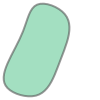

In [18]:
polygon

In [41]:
from pyautocad import Autocad
from src.parsing import Splitter

sheet = xw.sheets.active
table_range = sheet['A1'].expand('table')
data = table_range.value
headers = data[0]
col_index = headers.index("Номер точки")
numbers_from_excel = [row[col_index] for row in data[1:]]
acad = Autocad()
numbers_from_acad = []
for obj in acad.iter_objects(['AcDbText', 'AcDbMText']):
    if obj.Layer == "номера":
        numbers_from_acad.append(obj.TextString)
split_numbers_from_excel = []
for number_excel in numbers_from_excel:
    split_numbers_from_excel.extend(Splitter.number(str(number_excel)))
split_numbers_from_acad = []
for number_acad in numbers_from_acad:
    split_numbers_from_acad.extend(Splitter.number(str(number_acad)))

In [43]:
from collections import Counter

counter_split_numbers_from_excel = Counter(split_numbers_from_excel)
duplicates_split_numbers_from_excel = [key for key, value in counter_split_numbers_from_excel.items() if value > 1]
counter_split_numbers_from_acad = Counter(split_numbers_from_acad)
duplicates_split_numbers_from_acad = [key for key, value in counter_split_numbers_from_acad.items() if value > 1]
unique_in_excel = list(set(split_numbers_from_excel) - set(split_numbers_from_acad))
unique_in_acad = list(set(split_numbers_from_acad) - set(split_numbers_from_excel))

In [44]:
data = {
        "Дубликаты Excel": duplicates_split_numbers_from_excel,
        "Дубликаты Autocad": duplicates_split_numbers_from_acad,
        "Только в Excel": unique_in_excel,
        "Только в Autocad": unique_in_acad
    }
data

{'Дубликаты Excel': ['16'],
 'Дубликаты Autocad': ['28'],
 'Только в Excel': ['9', '27.3'],
 'Только в Autocad': ['14', '6']}

In [48]:
new_doc = xw.books.add()

In [49]:
new_doc.sheets[0]['A1'].value = ["Дубликаты Excel", "Дубликаты Autocad", "Только в Excel", "Только в Autocad"]

In [56]:
xw.sheets['Автокад']

<Sheet [TaxationTool_Excel.xlsm]Автокад>